## Reading in Data 

This is a key step. It's actually quite easy...

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

Above we have our packages, the `os` one is new. It allows us to get information about our computer, and most importantly information about the path, current working directory etc.

---
## Grabbing stuff from the web. 

First, this is the ideal way to go. Why? The key issue is that by just pointing to where it is stored anyone can go there and replicate, exlpore your results. In other words, everyone is working off of the same dataset or "gold plates" as I like to call it. In contrast, you may have data on your local computer, change it, save it. Then when if you try and do the same calculations on the data, you won't replicate your results. Why? You changed the data!

This is actually a big issue for companies: [see here](https://www.wsj.com/articles/stop-using-excel-finance-chiefs-tell-staffs-1511346601)

Great! How do I do it...here's how:

In [4]:
url1 = "https://raw.githubusercontent.com/NYUDataBootcamp"

url2 = "/Materials/master/Data/test.csv"

url  = url1 + url2        # location of the file on the www

df = pd.read_csv(url)     # read file and assign it to df

In [5]:
df

,name,x1,x2,x3
0,Dave,1,2,3.5
1,Chase,4,3,4.3
2,Spencer,5,6,7.8


So simple and clean. Very nice. Let's explore some more: Explore the help?

In [6]:
df_only2 = pd.read_csv(url, nrows = 2)

df_only2

,name,x1,x2,x3
0,Dave,1,2,3.5
1,Chase,4,3,4.3


Then this is cool too, set certain values to be read in as NaN (not a number)

In [7]:
df_notone = pd.read_csv(url, na_values = 1)

df_notone

,name,x1,x2,x3
0,Dave,NaN,2,3.5
1,Chase,4.0,3,4.3
2,Spencer,5.0,6,7.8


Now lets read in a different type of file an excel file

In [8]:
url3 = "/Materials/master/Data/test.xls"
url = url1 + url3

df_excel = pd.read_excel(url, na_values = 1) # Simmilar funcitonality!

df_excel

,name,x1,x2,x3
0,Dave,1,2,3.5
1,Chase,4,3,4.3
2,Spencer,5,6,7.8


- **Exercise.** Modify the code above, so it reads in the file `test0.csv` What happens?


- **Exercise.** Delete the 0 in test0 and rerun the code. What happens if you add the argument index_col=0 to the read_csv statement? How does df change?


- **Exercise.** In the read_excel code, change the file extension at the end of url2 from .xls to .xlsx. What does the new code produce?


- **Exercise.** Adapt the read_csv code to treat the numbers 1 and 6 as missing. Hint: See the example a page or so back.

---
## Reading in data from your computer...

This is important to know how to do as well. As you can imagine its useful all the time. It can be also helpful in the case that (i) you don't have internet access and (ii) for big data sets reading stuff on the web all the time might be slower that just reading in a local copy. So as you work on your projects, working off a local copy to experiment and play is not a bad idea.

First, lets write the data to a file

In [9]:
df.to_csv("df.csv")

df.to_excel("df.xlsx")

df.to_excel("df.xls")

Next question? **WHERE IS THE DATA**

With those commands it wrote this to your working directory. What does that mean, the folder that you are working in. Where is that...
- First, in jupyter just got to your browser window from which you opened a new notebook. It should be open in the folder that you started from (which is your working directory). Look there. See the files.


- Second, in python, we can find this out as well but using the os command..

In [10]:
my_path = os.getcwd()
my_path

'/Users/tinghao/notebooks/book_notebooks'

A couple of things about this: This should seem kind of familiar. In a PC, there is a difference it will show ``\\`` double backslashes...not the typical single backslash. **ON A MAC IT WILL BE YOUR STANDARD FOWARD SLASH**

Now lets use the path to write the data as well

In [24]:
df.to_csv(my_path + "\\"+"df1.csv")

df.to_excel(my_path + "\\"+"df1.xlsx")

df.to_excel(my_path + "\\"+"df1.xls")

Now read it in...

In [35]:
df_new = pd.read_excel("df1.xlsx")

In [36]:
df_new

,name,x1,x2,x3
0,Dave,1,2,3.5
1,Chase,4,3,4.3
2,Spencer,5,6,7.8


Now lets read it in with the complete path:

In [39]:
df_new = pd.read_excel(my_path + "\\" + "df1.xlsx")

df_new

,name,x1,x2,x3
0,Dave,1,2,3.5
1,Chase,4,3,4.3
2,Spencer,5,6,7.8


**Exercise** 
- Create a folder from the "home interface of jupyer"
- write the data frame to that folder
- read in the data from that folder

---
## Data Input Options

In [ ]:
grabbing specific sheets from multi-sheet excel files
  sperators
  columnsbbb
  headings
  skip footer, skip headers
  missing values
  discussion about encoding

---
## Let's Practice

#### Example #1: Penn World Table

In [7]:
url = "http://www.rug.nl/ggdc/docs/pwt81.xlsx"                   # Here is the correct link
   
pwt = pd.read_excel(url, sheetname= "Data")

C:\Program Files\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Excercise
- What is its shape?
- What are the column names?
- Download the worksheet as an excel file (just past the link in the browser) What does it look like?
- Exercise. Change the input in the last line of code to sheet_name=2. Why does this work?


In [10]:
country_summary = pwt.country.value_counts()

pandas.core.series.Series

#### Example #2: Pisa Scores

In [4]:
url = 'http://dx.doi.org/10.1787/888932937035'

pisa = pd.read_excel(url,
                     skiprows=18,             # skip the first 18 rows
                     skipfooter=7,            # skip the last 7
                     parse_cols=[0,1,9,13],   # select columns of interest
                     index_col=0,             # set the index as the first column
                     header=[0,1]             # set the variable names
                     )

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead


In [17]:
pisa.head()

,Mathematics,Reading,Science
,Mean score in PISA 2012,Mean score in PISA 2012,Mean score in PISA 2012
OECD average,494.046447,496.462864,501.159793
NaN,NaN,NaN,NaN
Shanghai-China,612.675536,569.588408,580.117831
Singapore,573.468314,542.215834,551.493157
Hong Kong-China,561.241096,544.600086,554.937434


In [19]:
pisa = pisa.dropna() ## Drop missing values

pisa.columns = ['Math', 'Reading', 'Science'] # Rename the columns, note that this is setup orginally as a multiindex 

pisa.head()

,Math,Reading,Science
OECD average,494.046447,496.462864,501.159793
Shanghai-China,612.675536,569.588408,580.117831
Singapore,573.468314,542.215834,551.493157
Hong Kong-China,561.241096,544.600086,554.937434
Chinese Taipei,559.824796,523.118904,523.314904


In [20]:
pisa.Math.describe()

pisa.corr()

,Math,Reading,Science
Math,1.000000,0.959806,0.972131
Reading,0.959806,1.000000,0.978559
Science,0.972131,0.978559,1.000000


In [21]:
pisa.loc["United States"] / pisa.mean()

Math       1.016302
Reading    1.049041
Science    1.038508
dtype: float64

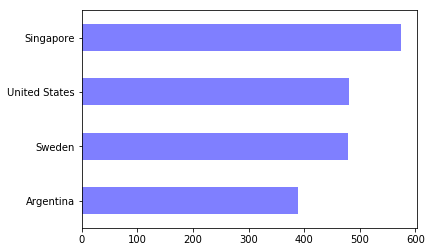

In [44]:
countries = ["United States", "Singapore", "Argentina", "Sweden"]

# pisa["Math"][countries].plot(kind = 'barh') My first attack on this...

pisa["Math"][countries].sort_values().plot(kind = 'barh', color = "blue", alpha = 0.5) 

plt.show()

#### Example #3: Movie 

In [45]:
url  = 'http://pages.stern.nyu.edu/~dbackus/Data/cast.csv'
cast = pd.read_csv(url)

# some stuff on encoding
# http://pandaproject.net/docs/determining-the-encoding-of-a-csv-file.html

In [50]:
cast.head()

cast.shape

(3311647, 6)

In [54]:
cast.title.value_counts().mean()

20.764239315810595

In [55]:
cast.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [59]:
cast.set_index("name").loc["George Clooney"].head()

,title,year,type,character,n
name,,,,,
George Clooney,A Very Murray Christmas,2015,actor,Himself,NaN
George Clooney,Batman & Robin,1997,actor,Batman,2.0
George Clooney,Batman & Robin,1997,actor,Bruce Wayne,2.0
George Clooney,Burn After Reading,2008,actor,Harry Pfarrer,1.0
George Clooney,Confessions of a Dangerous Mind,2002,actor,Jim Byrd,17.0


In [60]:
cast.set_index("name").loc["George Clooney"].year.min()

1987

In [64]:
cast.set_index("title").loc["Star Wars"].sort_values("n")

,year,name,type,character,n
title,,,,,
Star Wars,1977,Mark Hamill,actor,Luke Skywalker,1.0
Star Wars,1977,Harrison Ford,actor,Han Solo,2.0
Star Wars,1977,Carrie Fisher,actress,Princess Leia Organa,3.0
Star Wars,1977,Peter Cushing,actor,Grand Moff Tarkin,4.0
Star Wars,1977,Alec Guinness,actor,Ben Obi-Wan Kenobi,5.0
Star Wars,1977,Anthony Daniels,actor,C-3PO,6.0
Star Wars,1977,Kenny Baker,actor,R2-D2,7.0
Star Wars,1977,Peter (II) Mayhew,actor,Chewbacca,8.0
Star Wars,1977,David Prowse,actor,Darth Vader,9.0
